In [1]:
import numpy as np

def logistic_function(x):
    """
    Computes the logistic (sigmoid) function.
    """
    return 1 / (1 + np.exp(-x))


In [2]:
def log_loss(y_true, y_pred):
    """
    Computes log loss for binary classification.
    """
    y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)  # avoid log(0)
    return -(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))#Formula:𝐿(𝑦,𝑦^)=−𝑦log(𝑦^)−(1−𝑦)log(1−𝑦^)


In [3]:
def cost_function(y_true, y_pred):
    """
    Computes average log loss across all samples.
    """
    n = len(y_true)
    loss_vec = log_loss(y_true, y_pred)
    return np.mean(loss_vec)#cost function is mean of logloss.


In [4]:
def costfunction_logreg(X, y, w, b):
    """
    Computes cost for logistic regression given parameters.
    """
    z = np.dot(X, w) + b #With parameters w,b
    y_pred = logistic_function(z)
    return cost_function(y, y_pred)


In [7]:
def compute_gradient(X, y, w, b):
    """
    Computes gradients for weights and bias.
    """
    n, d = X.shape
    z = np.dot(X, w) + b
    y_pred = logistic_function(z)
    error = y - y_pred
    grad_w = -(1/n) * np.dot(X.T, error)
    grad_b = -(1/n) * np.sum(error)
    return grad_w, grad_b


In [8]:
def gradient_descent(X, y, w, b, alpha, n_iter):
    cost_history = []
    for i in range(n_iter):
        grad_w, grad_b = compute_gradient(X, y, w, b)
        w -= alpha * grad_w
        b -= alpha * grad_b
        cost = costfunction_logreg(X, y, w, b)
        cost_history.append(cost)
    return w, b, cost_history


In [9]:
def prediction(X, w, b, threshold=0.5):
    z = np.dot(X, w) + b
    y_prob = logistic_function(z)
    return (y_prob >= threshold).astype(int)#for example (true,false,ture)=(1,0,1)


In [11]:
def evaluate_classification(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))

    confusion_matrix = np.array([[TN, FP], [FN, TP]])
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1_score = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

    return {
        "confusion_matrix": confusion_matrix,
        "precision": precision,
        "recall": recall,
        "f1_score": f1_score
    }


Training Logistic Regression Model...



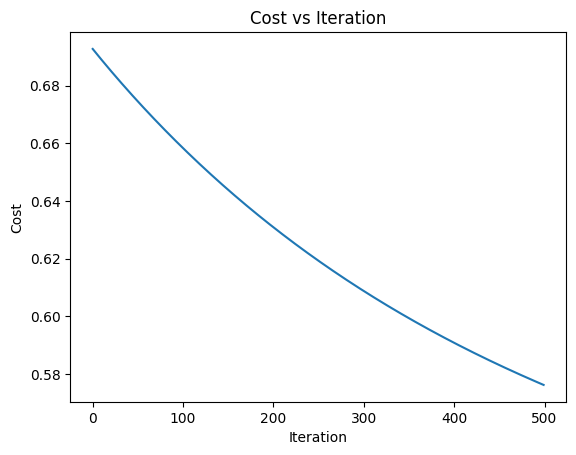


Final Parameters:
Weights: [ 0.19827959 -2.36738306]
Bias: 0.2456613809626195

Confusion Matrix:
 [[2 0]
 [1 1]]
Precision: 1.00
Recall: 0.50
F1-Score: 0.67


In [14]:
#  TEST 


# Sample dataset (tiny, for testing)
X = np.array([[0.1, 0.2], [-0.1, 0.1], [0.3, -0.2], [0.5, 0.4]])
y = np.array([1, 0, 1, 0])

# Initialize parameters
w = np.zeros(X.shape[1])
b = 0.0
alpha = 0.1
n_iter = 500

print("Training Logistic Regression Model...\n")
w_out, b_out, cost_history = gradient_descent(X, y, w, b, alpha, n_iter)

# Plot cost convergence
plt.plot(cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost vs Iteration")
plt.show()

# Predictions
y_pred = prediction(X, w_out, b_out)

# Evaluation
metrics = evaluate_classification(y, y_pred)

print("\nFinal Parameters:")
print("Weights:", w_out)
print("Bias:", b_out)
print("\nConfusion Matrix:\n", metrics["confusion_matrix"])
print(f"Precision: {metrics['precision']:.2f}")
print(f"Recall: {metrics['recall']:.2f}")
print(f"F1-Score: {metrics['f1_score']:.2f}")


Iteration 0: Cost = 1.129600
Iteration 100: Cost = 1.101659
Iteration 200: Cost = 1.097742
Iteration 300: Cost = 1.094720
Iteration 400: Cost = 1.092379
Iteration 500: Cost = 1.090564
Iteration 600: Cost = 1.089155
Iteration 700: Cost = 1.088061
Iteration 800: Cost = 1.087209
Iteration 900: Cost = 1.086545
Iteration 999: Cost = 1.086031


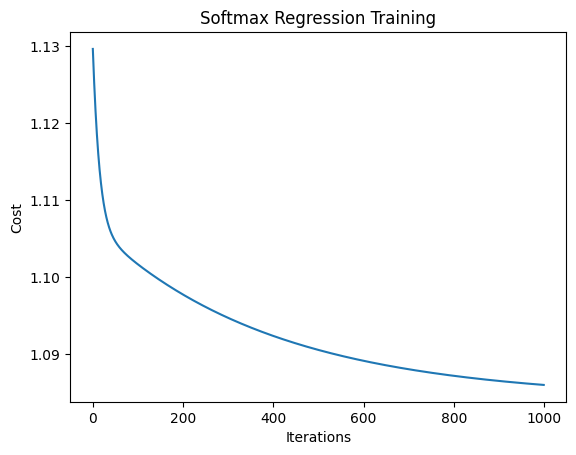

Training Accuracy: 0.395


In [1]:
import numpy as np
import matplotlib.pyplot as plt
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

def loss_softmax(y_true, y_pred):
    return -np.sum(y_true * np.log(y_pred + 1e-10))

def cost_softmax(X, y, W, b):
    n = X.shape[0]
    z = np.dot(X, W) + b
    y_pred = softmax(z)
    return -np.sum(y * np.log(y_pred + 1e-10)) / n

def compute_gradient_softmax(X, y, W, b):
    n = X.shape[0]
    z = np.dot(X, W) + b
    y_pred = softmax(z)
    grad_W = np.dot(X.T, (y_pred - y)) / n
    grad_b = np.sum(y_pred - y, axis=0) / n
    return grad_W, grad_b
def gradient_descent_softmax(X, y, W, b, alpha, n_iter, show_cost=False):
    cost_history = []
    for i in range(n_iter):
        grad_W, grad_b = compute_gradient_softmax(X, y, W, b)
        W -= alpha * grad_W
        b -= alpha * grad_b
        cost = cost_softmax(X, y, W, b)
        cost_history.append(cost)
        if show_cost and (i % 100 == 0 or i == n_iter - 1):
            print(f"Iteration {i}: Cost = {cost:.6f}")
    return W, b, cost_history
def predict(X, W, b):
    z = np.dot(X, W) + b
    y_pred = softmax(z)
    return np.argmax(y_pred, axis=1)
# Generate synthetic dataset
np.random.seed(0)
n, d, c = 200, 5, 3   # 200 samples, 5 features, 3 classes
X = np.random.rand(n, d)

# Create random labels
y_indices = np.random.randint(0, c, size=n)
y = np.zeros((n, c))
y[np.arange(n), y_indices] = 1  # One-hot encoding

# Initialize parameters
W = np.random.rand(d, c)
b = np.random.rand(c)

# Train model
alpha = 0.05
n_iter = 1000
W_opt, b_opt, cost_history = gradient_descent_softmax(X, y, W, b, alpha, n_iter, show_cost=True)

# Plot cost vs iterations
plt.plot(cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Softmax Regression Training")
plt.show()

# Predictions
y_pred_classes = predict(X, W_opt, b_opt)
accuracy = np.mean(y_pred_classes == y_indices)
print("Training Accuracy:", accuracy)
